In [ ]:
import cv2


# cheking if everything uploaded

In [ ]:
import os
count=0
for i in range(0,7215):
  i=str(i)
  file_path = "drive/MyDrive/emotiondataset/train/Happy/"+i+".jpg"

  if os.path.exists(file_path):
    pass
  else:
    count=count+1

print(count)

0


# making a dataframe where all the col1=path col2=target emotion

In [ ]:
base_path='drive/MyDrive/emotiondataset/train/'
emotions = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

In [ ]:
data = []


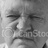

In [ ]:
from IPython.display import Image
Image("drive/MyDrive/emotiondataset/train/Disgust/100.jpg"	)

In [ ]:

for emotion in emotions:
    folder_path = os.path.join(base_path, emotion)
     # emotion folder under base_path
    # Check if the folder exists to gracefully handle missing emotion folders
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(folder_path, filename)
                # You can load and process the image here using PIL (e.g., resize, convert to grayscale)
                # image = Image.open(image_path)
                # ... processing ...
                data.append([image_path, emotion])
    else:
        print(f"Warning: Emotion folder not found: {folder_path}")

In [ ]:
len(data)

28709

In [ ]:
data

[['drive/MyDrive/emotiondataset/train/Angry/3694.jpg', 'Angry'],
 ['drive/MyDrive/emotiondataset/train/Angry/3695.jpg', 'Angry'],
 ['drive/MyDrive/emotiondataset/train/Angry/3696.jpg', 'Angry'],
 ['drive/MyDrive/emotiondataset/train/Angry/3697.jpg', 'Angry'],
 ['drive/MyDrive/emotiondataset/train/Angry/3698.jpg', 'Angry'],
 ['drive/MyDrive/emotiondataset/train/Angry/3699.jpg', 'Angry'],
 ['drive/MyDrive/emotiondataset/train/Angry/37.jpg', 'Angry'],
 ['drive/MyDrive/emotiondataset/train/Angry/370.jpg', 'Angry'],
 ['drive/MyDrive/emotiondataset/train/Angry/3700.jpg', 'Angry'],
 ['drive/MyDrive/emotiondataset/train/Angry/3701.jpg', 'Angry'],
 ['drive/MyDrive/emotiondataset/train/Angry/3702.jpg', 'Angry'],
 ['drive/MyDrive/emotiondataset/train/Angry/3703.jpg', 'Angry'],
 ['drive/MyDrive/emotiondataset/train/Angry/3704.jpg', 'Angry'],
 ['drive/MyDrive/emotiondataset/train/Angry/3705.jpg', 'Angry'],
 ['drive/MyDrive/emotiondataset/train/Angry/3706.jpg', 'Angry'],
 ['drive/MyDrive/emotiondata

In [ ]:

import pandas as pd

# Assuming 'data' list is already populated as shown in the previous code
# ... (your existing code to populate the 'data' list) ...

# Create DataFrame with 'image_path' and 'target' columns
df = pd.DataFrame(data, columns=['image_path', 'target'])
df

,image_path,target
0,drive/MyDrive/emotiondataset/train/Angry/3694.jpg,Angry
1,drive/MyDrive/emotiondataset/train/Angry/3695.jpg,Angry
2,drive/MyDrive/emotiondataset/train/Angry/3696.jpg,Angry
3,drive/MyDrive/emotiondataset/train/Angry/3697.jpg,Angry
4,drive/MyDrive/emotiondataset/train/Angry/3698.jpg,Angry
...,...,...
28704,drive/MyDrive/emotiondataset/train/Surprise/11...,Surprise
28705,drive/MyDrive/emotiondataset/train/Surprise/11...,Surprise
28706,drive/MyDrive/emotiondataset/train/Surprise/11...,Surprise
28707,drive/MyDrive/emotiondataset/train/Surprise/11...,Surprise


In [ ]:
emotion_counts = df['target'].value_counts()

In [ ]:
emotion_counts

,count
target,
Happy,7215
Neutral,4965
Sad,4830
Fear,4097
Angry,3995
Surprise,3171
Disgust,436


In [ ]:
# prompt: convert the df into csv

df.to_csv('drive/MyDrive/expression recognition/fer2013/emotion_data.csv', index=False)


In [16]:
import pandas as pd
df2=pd.read_csv('drive/MyDrive/expression recognition/fer2013/emotion_data.csv')

In [17]:
df2.head()

,image_path,target
0,drive/MyDrive/emotiondataset/train/Angry/3694.jpg,Angry
1,drive/MyDrive/emotiondataset/train/Angry/3695.jpg,Angry
2,drive/MyDrive/emotiondataset/train/Angry/3696.jpg,Angry
3,drive/MyDrive/emotiondataset/train/Angry/3697.jpg,Angry
4,drive/MyDrive/emotiondataset/train/Angry/3698.jpg,Angry


In [ ]:
import numpy as np
def get_pixel_values(image_path):
    try:
        # Read the image in grayscale mode (or RGB if needed)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Use IMREAD_COLOR for RGB

        # Resize the image to a consistent size (e.g., 64x64 pixels)
        img_resized = cv2.resize(img, (64, 64))

        # Flatten the 2D image into a 1D array
        img_flattened = img_resized.flatten()

        # Normalize pixel values (optional, but recommended)
        img_normalized = img_flattened / 255.0

        return img_normalized
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return np.nan  # Return NaN if there's an issue

# Apply the function to create the 'pixels' column
df['pixels'] = df['image_path'].apply(get_pixel_values)

# Display the updated DataFrame
print(df.head())